# Hypothesis testing practical exercises

## Question 1

In [18]:
library(reshape2) #for melting dataframe
library(psych)

S1 <- c(9.9,
                9.4,
                10.0,
                10.3,
                10.6,
                10.3,
                9.3,
                9.8)

S2 <- c(10.2,
                10.0,
                10.7,
                10.5,
                10.6,
                10.2,
                10.4,
                10.3)

#Converting into a data frame
df <- data.frame(S1, S2)

#melting the data frame 
melted_df <- melt(df)
colnames(melted_df)<-c("Service","Delay")
melted_df

Using  as id variables


Service,Delay
S1,9.9
S1,9.4
S1,10.0
S1,10.3
S1,10.6
S1,10.3
S1,9.3
S1,9.8
S2,10.2
S2,10.0


### a)

In [23]:
mean(S1)
sqrt(var(S1))

[1] 9.95

[1] 0.4503967

In [24]:
mean(S2)
sqrt(var(S2))

[1] 10.3625

[1] 0.2326094

Other way to calculate it if you have a data frame

In [20]:
describeBy(melted_df$Delay, melted_df$Service)


 Descriptive statistics by group 
group: S1
   vars n mean   sd median trimmed  mad min  max range  skew kurtosis   se
X1    1 8 9.95 0.45   9.95    9.95 0.52 9.3 10.6   1.3 -0.11    -1.54 0.16
------------------------------------------------------------ 
group: S2
   vars n  mean   sd median trimmed  mad min  max range  skew kurtosis   se
X1    1 8 10.36 0.23  10.35   10.36 0.22  10 10.7   0.7 -0.02     -1.5 0.08

### b)

H0: $\mu _1 = \mu _2$

H1: $\mu _1 ≠ \mu _2$

### c)
Assuming that the servers do not have the same variance we use a Welch Two Sample t-test

In [34]:
#Looking at the difference
mean(S1)-mean(S2)

#now comparing with a t-test
t.test(S1,S2, conf.level=0.95)

#if using the formula api (same results!!)
t.test(Delay ~ Service, data=melted_df, conf.level = 0.95)

[1] -0.4125


	Welch Two Sample t-test

data:  S1 and S2
t = -2.3016, df = 10.486, p-value = 0.043
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8093363 -0.0156637
sample estimates:
mean of x mean of y 
   9.9500   10.3625 



	Welch Two Sample t-test

data:  Delay by Service
t = -2.3016, df = 10.486, p-value = 0.043
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8093363 -0.0156637
sample estimates:
mean in group S1 mean in group S2 
          9.9500          10.3625 


The confidence interval of the differences between S1 and S2 is:

95 percent confidence interval:
 -0.8093363 -0.0156637

### d)
As the p-value is lower than alpha we can reject the null hypothesis. Therefore there we have evidence that the delay for S1 is different than for S2 (and S1 is lower) 

### e)
Yes, see the plots below...

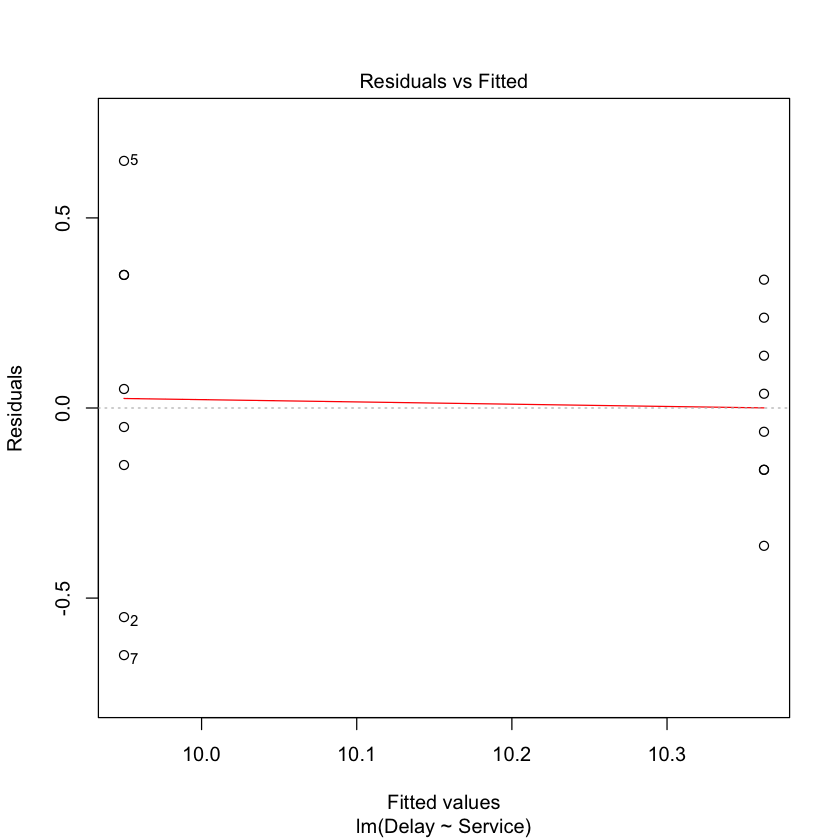

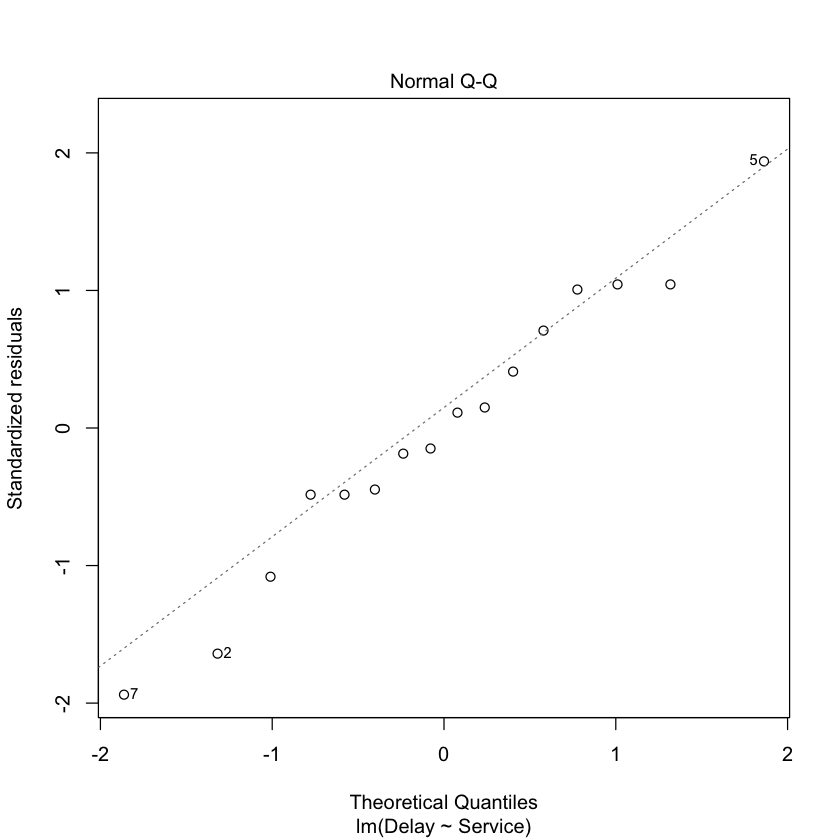

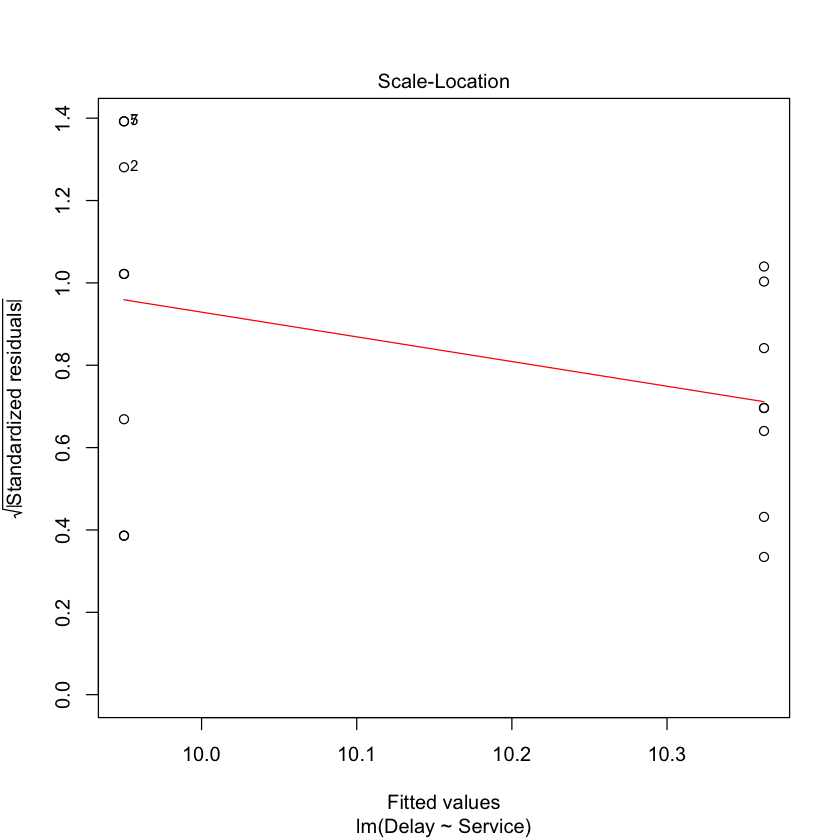

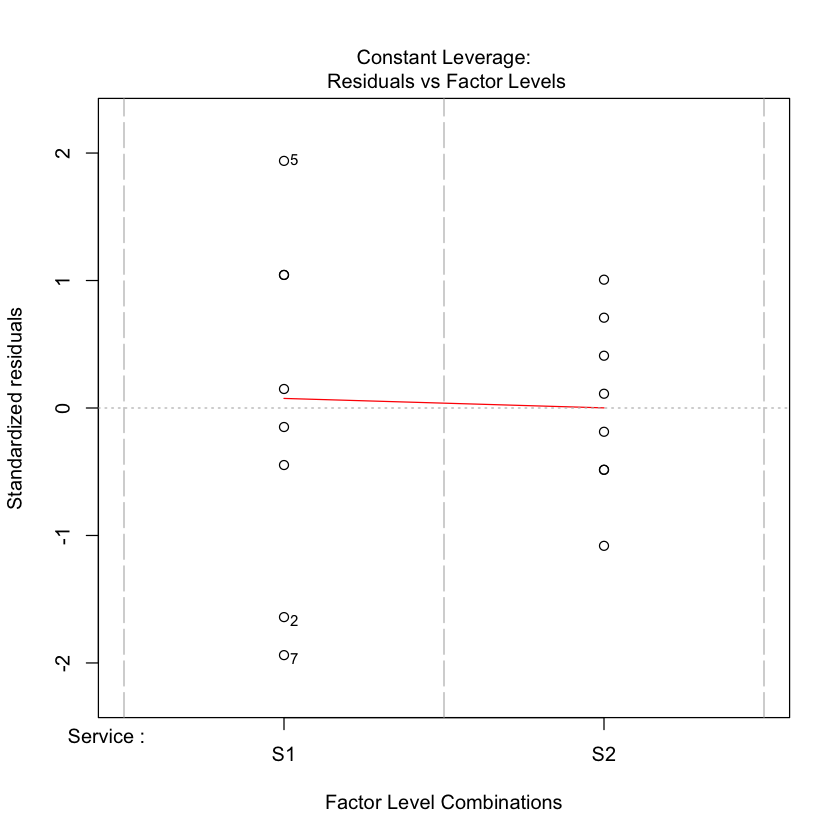

In [35]:
s.model <- lm(Delay ~ Service, data=melted_df)
plot(s.model)
#alternatively you can use different methods
#tests like Shapiro, use the qqplot function

## Question 2

In [38]:
nA <- 64454
nB <- 61818
nT <- nA + nB

### a)

In [40]:
pA <- nA/nT
pB <- nB/nT
pA
pB

[1] 0.5104378

[1] 0.4895622

### b)

H0: $pA = 0.5$

H1: $pA ≠ 0.5$

### c)

Calculating manually as we don't have the dataset itself..

In [54]:
sigma <- sqrt(0.5*(1-0.5)/nT)
sigma
z<- (pA - 0.5)/sigma
z
qnorm(1-(0.001/2),mean= 0, sd=1)

[1] 0.001407072

[1] 7.418086

[1] 3.290527

As z is greater than the z-value from the distribution we can reject the null hypothesis

We have SRM in this case

## Question 3

In [55]:
bottles <- c(108,
            124,
            124,
            106,
            115,
            138,
            163,
            159,
            134,
            139)

### a)
H0: $\mu _{bottles} = 120$

H1: $\mu _{bottles} ≠ 120$

### b)
One sample t-test

In [58]:
#now comparing with a t-test
?t.test
t.test(bottles,conf.level=0.99, mu=120)


	One Sample t-test

data:  bottles
t = 1.7798, df = 9, p-value = 0.1088
alternative hypothesis: true mean is not equal to 120
99 percent confidence interval:
 110.914 151.086
sample estimates:
mean of x 
      131 


As the p-value is greater than the significance level we CANNOT reject the null hypothesis

### c)

The 99% confidence level of the mean shelf life is 110.914 151.086

## Question 4

In [61]:
Temperature <-c(80, 
                93,
                100,
                82,
                90,
                99,
                81,
                96,
                94,
                93,
                97,
                95,
                100,
                85,
                86,
                87
                )
Catalyst <- c(8,
                9,
                10,
                12,
                11,
                8,
                8,
                10,
                12,
                11,
                13,
                11,
                8,
                12,
                9,
                12
                )
Viscosity <- c(2256,
                2340,
                2426,
                2293,
                2330,
                2368,
                2250,
                2409,
                2364,
                2379,
                2440,
                2364,
                2404,
                2317,
                2309,
                2328
                )
q4df <- data.frame(Temperature,Catalyst,Viscosity)
q4df

Temperature,Catalyst,Viscosity
80,8,2256
93,9,2340
100,10,2426
82,12,2293
90,11,2330
99,8,2368
81,8,2250
96,10,2409
94,12,2364
93,11,2379


### a)

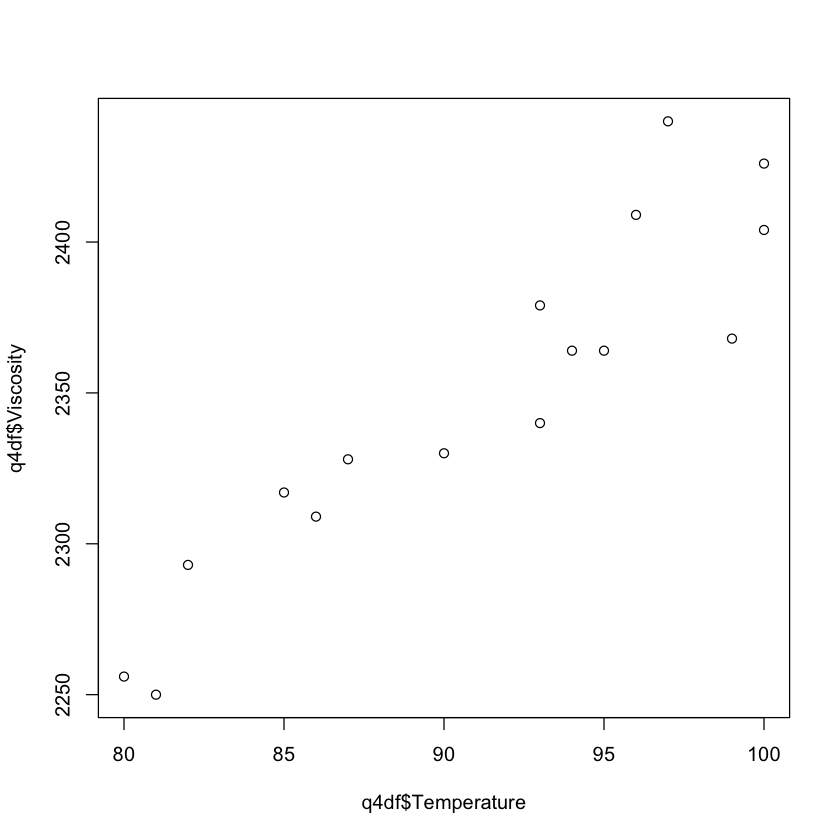

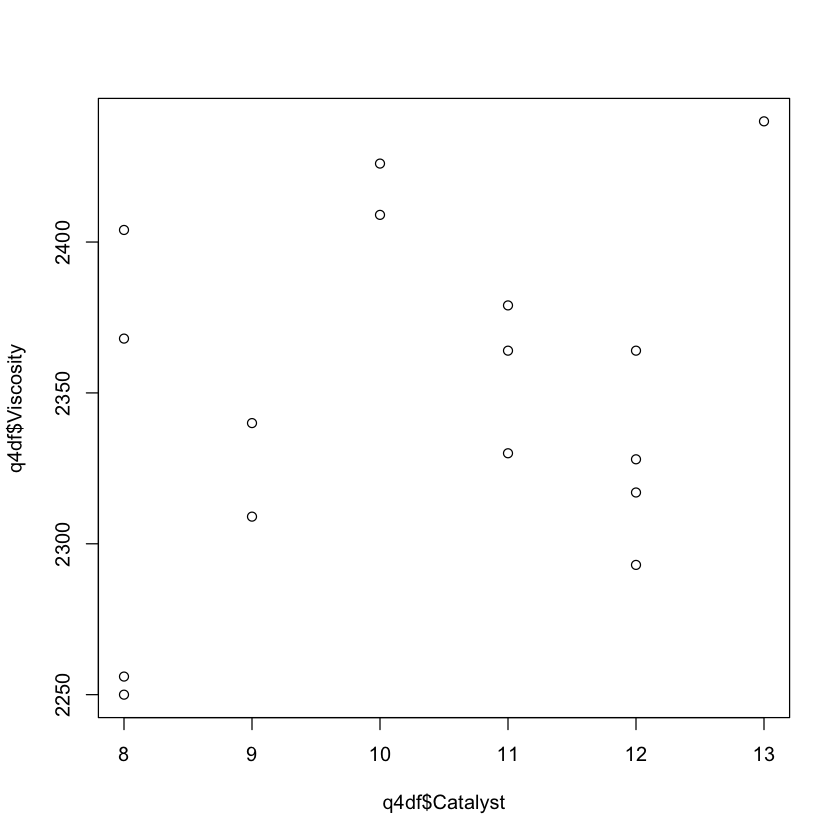

In [65]:
plot(q4df$Temperature,q4df$Viscosity)
plot(q4df$Catalyst,q4df$Viscosity)

### b)

In [68]:
q4.model <- lm(data=q4df, Viscosity ~ Temperature + Catalyst)
summary(q4.model)


Call:
lm(formula = Viscosity ~ Temperature + Catalyst, data = q4df)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.4972 -13.1978  -0.4736  10.5558  25.4299 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1566.0778    61.5918   25.43 1.80e-12 ***
Temperature    7.6213     0.6184   12.32 1.52e-08 ***
Catalyst       8.5848     2.4387    3.52  0.00376 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.36 on 13 degrees of freedom
Multiple R-squared:  0.927,	Adjusted R-squared:  0.9157 
F-statistic:  82.5 on 2 and 13 DF,  p-value: 4.1e-08


### c)

$$ y = 1556.08 + 7.6213x_1 + 8.58x_2$$

$y$ is the Viscosity

$x_1$ is the Temperature

$x_2$ is the Catalyst feed rate


### d)
Yes and Yes

### e)

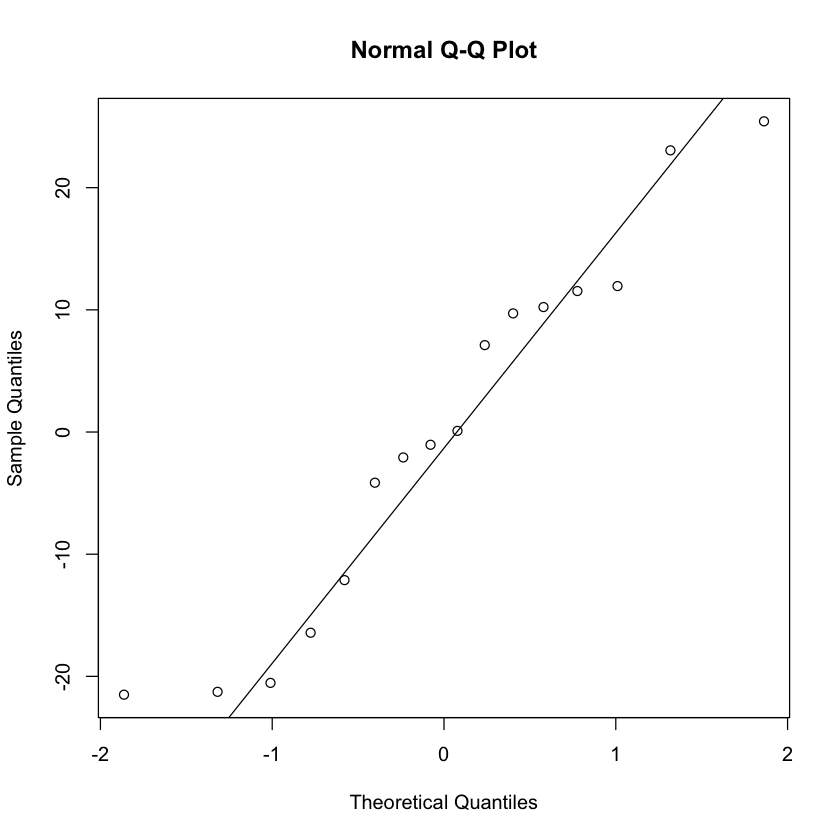

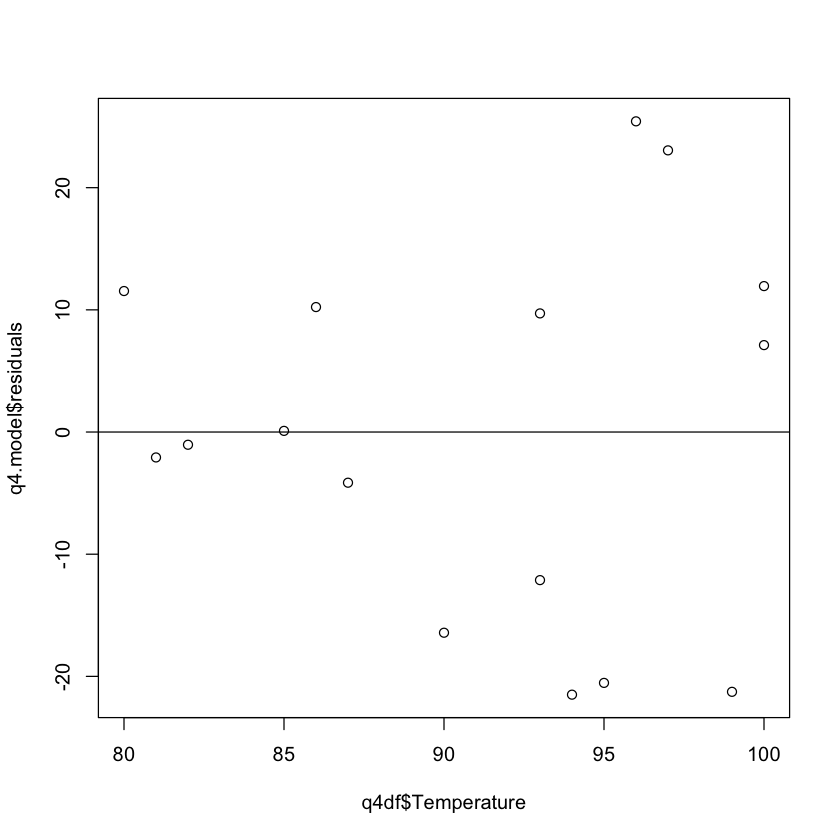

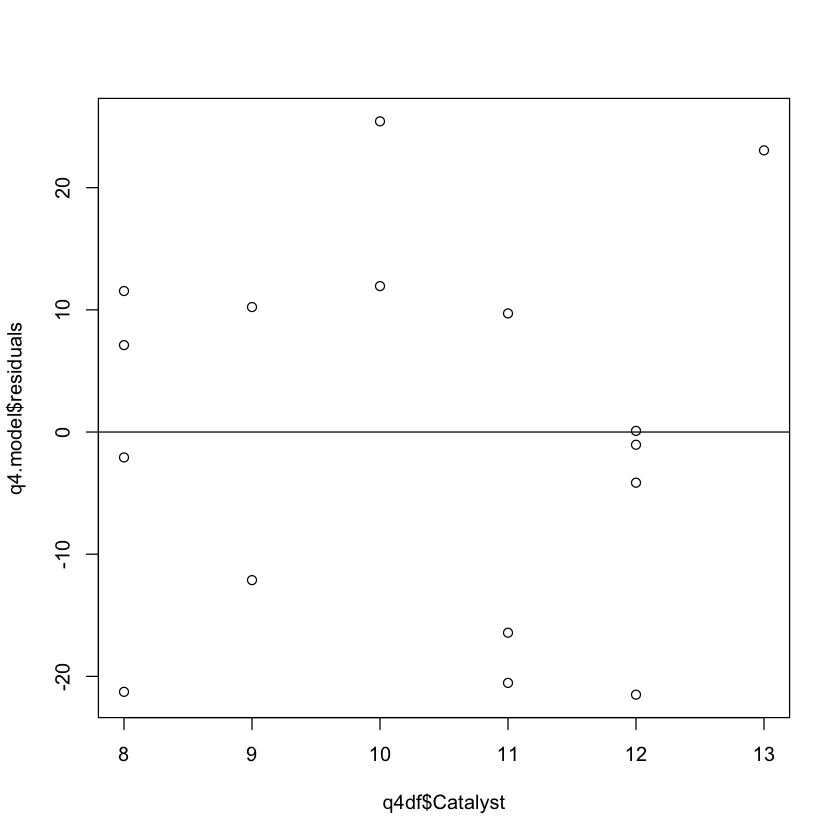

In [82]:
#qqplot of the residuals (could also use plot(q4.model))
qqnorm(q4.model$residuals)
qqline(q4.model$residuals)
#plot(q4.model) #the qq plot here uses the standard residuals

plot(q4df$Temperature, q4.model$residuals)
abline(0,0)
plot(q4df$Catalyst, q4.model$residuals)
abline(0,0)